## Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import InceptionV3, ResNet50
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input

## Preprocess

In [2]:
def load_preprocess(dir, label, preprocess_func):
    images = []
    labels = []
    for file in os.listdir(dir):
        img = load_img(os.path.join(dir, file), target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = preprocess_func(img_array)  
        images.append(img_array)
        labels.append(label)

    return np.array(images), np.array(labels)

healthy_dir = 'Healthy'
unhealthy_dir = 'Unhealthy'

healthy_images, healthy_labels = load_preprocess(healthy_dir, 1, preprocess_input)
unhealthy_images, unhealthy_labels = load_preprocess(unhealthy_dir, 0, preprocess_input)

X = np.concatenate((healthy_images, unhealthy_images), axis=0)
y = np.concatenate((healthy_labels, unhealthy_labels), axis=0)


## Models

In [3]:
def inceptionv3():
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [4]:
def resnet50():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

## Model Evaluation

In [5]:
def train_evaluate(X_train, X_test, y_train, y_test, model):
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    return history, test_loss, test_accuracy

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

inceptionv3_model = inceptionv3()
inceptionv3_history, inceptionv3_test_loss, inceptionv3_test_accuracy = train_evaluate(X_train, X_test, y_train, y_test, inceptionv3_model)

resnet50_model = resnet50()
resnet50_history, resnet50_test_loss, resnet50_test_accuracy = train_evaluate(X_train, X_test, y_train, y_test, resnet50_model)




Epoch 1/10


22/22 [==============================] - 25s 896ms/step - loss: 0.6994 - accuracy: 0.6715 - val_loss: 0.4420 - val_accuracy: 0.7977
Epoch 2/10
22/22 [==============================] - 17s 762ms/step - loss: 0.2985 - accuracy: 0.8726 - val_loss: 0.3579 - val_accuracy: 0.8555
Epoch 3/10
22/22 [==============================] - 16s 756ms/step - loss: 0.2474 - accuracy: 0.8973 - val_loss: 0.2961 - val_accuracy: 0.8728
Epoch 4/10
22/22 [==============================] - 17s 774ms/step - loss: 0.1745 - accuracy: 0.9349 - val_loss: 0.2863 - val_accuracy: 0.8844
Epoch 5/10
22/22 [==============================] - 17s 780ms/step - loss: 0.1415 - accuracy: 0.9537 - val_loss: 0.2344 - val_accuracy: 0.8960
Epoch 6/10
22/22 [==============================] - 17s 768ms/step - loss: 0.1098 - accuracy: 0.9740 - val_loss: 0.2248 - val_accuracy: 0.9133
Epoch 7/10
22/22 [==============================] - 16s 735ms/step - loss: 0.0892 - accuracy: 0.9783 - val_loss: 0.2405 - val_accuracy: 0.

## Graphs

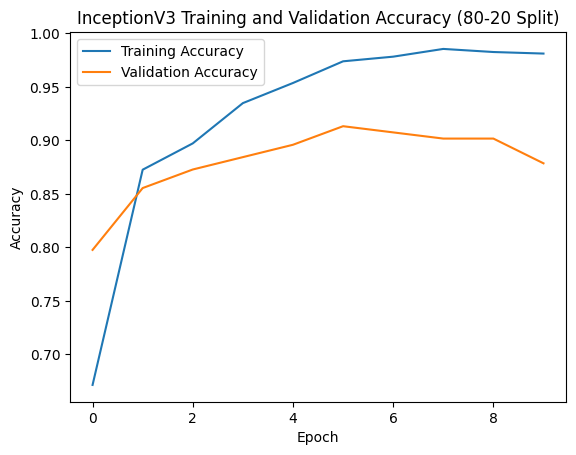

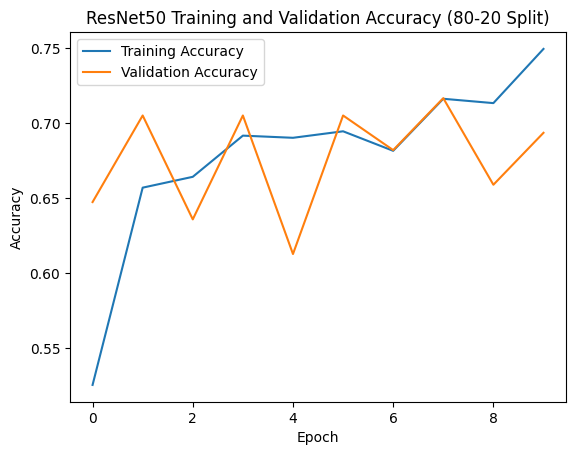

In [7]:
def plot_training(history, title):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(title)
    plt.show()

plot_training(inceptionv3_history, 'InceptionV3 Training and Validation Accuracy (80-20 Split)')
plot_training(resnet50_history, 'ResNet50 Training and Validation Accuracy (80-20 Split)')

In [8]:
print("InceptionV3 Test Accuracy:", inceptionv3_test_accuracy)
print("ResNet50 Test Accuracy:", resnet50_test_accuracy)

InceptionV3 Test Accuracy: 0.8786126971244812
ResNet50 Test Accuracy: 0.6936416029930115


In [9]:
def image_status(image_path, model):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)  
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)

    if prediction[0][0] > 0.5:
        return "Healthy"
    else:
        return "Infected with red rot"

image_path = 'D:\College\SEM-8\CAPSTONE\RED ROT\VS_CODE\Healthy\healthy_128.jpg'
inceptionv3_prediction = image_status(image_path, inceptionv3_model)
resnet50_prediction = image_status(image_path, resnet50_model)

print("Prediction for the image using inceptionv3:", inceptionv3_prediction)
print("Prediction for the image using resnet50:", resnet50_prediction)


1/1 [==============================] - 2s 2s/step
Prediction for the image using inceptionv3: Healthy
Prediction for the image using resnet50: Healthy
